In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data_url="https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/walmart_workflow_data.csv"

In [6]:
df=pd.read_csv(data_url)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpu_usage         1000 non-null   float64
 1   memory_util       1000 non-null   float64
 2   disk_io           1000 non-null   float64
 3   error_count       1000 non-null   int64  
 4   latency_sec       1000 non-null   float64
 5   queue_depth       1000 non-null   int64  
 6   priority_level    1000 non-null   int64  
 7   dependency_count  1000 non-null   int64  
 8   retry_attempts    1000 non-null   int64  
 9   data_volume_mb    1000 non-null   float64
 10  workflow_failed   1000 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 86.1 KB


In [8]:
# Step 2: Separate features and target
X = df.drop("workflow_failed", axis=1) # features axis 1 means dropping column axis = 0 drop rows
y = df["workflow_failed"] # label

In [11]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X

,cpu_usage,memory_util,disk_io,error_count,latency_sec,queue_depth,priority_level,dependency_count,retry_attempts,data_volume_mb
0,0.699343,0.999839,0.156822,3,40.117238,11,2,5,0,9833.838268
1,0.572347,0.881158,0.020487,2,69.817893,1,1,6,0,6386.743205
2,0.729538,0.664908,0.128691,3,33.261327,5,1,2,0,4484.418010
3,0.904606,0.488266,0.035297,3,8.749848,13,1,8,4,4962.295594
4,0.553169,0.824556,0.495446,5,27.686070,14,2,4,2,6856.542756
...,...,...,...,...,...,...,...,...,...,...
995,0.543780,0.917538,0.125859,3,40.828882,7,1,3,3,1568.187175
996,0.959537,0.643370,0.599987,4,8.441883,2,3,9,0,8567.827690
997,0.728169,0.429531,0.050499,4,17.186300,7,1,9,1,6783.924159
998,0.485764,0.609233,0.025908,3,22.014357,9,1,3,2,1785.307021


In [16]:
# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # training time 
X_test_scaled = scaler.transform(X_test) # will required for testing time 

In [14]:
# Step 5: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
# Step 6: Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.715

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.82       137
           1       0.61      0.27      0.37        63

    accuracy                           0.71       200
   macro avg       0.67      0.59      0.59       200
weighted avg       0.69      0.71      0.68       200



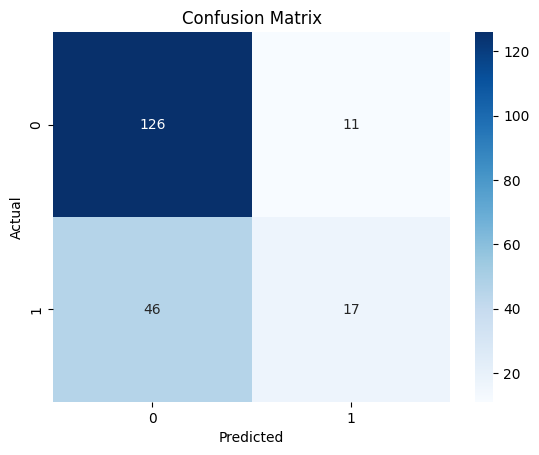

In [18]:
# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Step 8: User input (inline, no function)
print("\n🔍 Enter the following feature values to predict workflow failure:")

cpu_usage = float(input("Enter cpu_usage: "))
memory_util = float(input("Enter memory_util: "))
disk_io = float(input("Enter disk_io: "))
error_count = float(input("Enter error_count: "))
latency_sec = float(input("Enter latency_sec: "))
queue_depth = float(input("Enter queue_depth: "))
priority_level = float(input("Enter priority_level: "))
dependency_count = float(input("Enter dependency_count: "))
retry_attempts = float(input("Enter retry_attempts: "))
data_volume_mb = float(input("Enter data_volume_mb: "))

# Step 9: Prepare input and scale
user_input = pd.DataFrame([[
    cpu_usage, memory_util, disk_io, error_count,
    latency_sec, queue_depth, priority_level,
    dependency_count, retry_attempts, data_volume_mb
]], columns=X.columns)

user_input_scaled = scaler.transform(user_input)

# Step 10: Predict
prediction = model.predict(user_input_scaled)[0]
probability = model.predict_proba(user_input_scaled)[0][1]

# Step 11: Output
result = "🚫 Workflow likely to FAIL!" if prediction == 1 else "✅ Workflow likely to SUCCEED."
print(f"\nPrediction: {result}")
print(f"Failure Probability: {probability:.2%}")


🔍 Enter the following feature values to predict workflow failure:


Enter cpu_usage:  0.6993428306020987
Enter memory_util:  0.999838859145007
Enter disk_io:  0.1568221419151087
Enter error_count:  4
Enter latency_sec:  59.11723819681187
Enter queue_depth:  9
Enter priority_level:  3
Enter dependency_count:  4
Enter retry_attempts:  0
